# Figure S8

This figure from the Supplementary Material shows the effect of washing on the sensor electrical properties.

> [1] Brett C. Hannigan, Tyler J. Cuthbert, Chakaveh Ahmadizadeh, and Carlo Menon. Distributed Sensing Along Fibres for Smart Clothing. Science Advances. 2023 (In Review).

©2023 ETH Zurich, Brett Hannigan; D-HEST; Biomedical and Mobile Health Technology (BMHT) Lab; Carlo Menon

In [2]:
library(ggplot2)
library(cowplot)
library(magick)
library(tidyr)
library(dplyr)
library(ggh4x)
library(readxl)

## Import Data

Data recorded manually in Excel format.

In [67]:
washing_test <- read_excel("WashingTest.xlsx", range="A4:K147", col_names=c("freq", "n.washes", "sample", "radius", "length", "nominal.strain", "strain", "Zmag", "Zphase", "Rs", "Cs"))
head(washing_test)

freq,n.washes,sample,radius,length,nominal.strain,strain,Zmag,Zphase,Rs,Cs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12500,0,1,0,9.8,0.0,0.0000000,272.7,-85.70,20.44670,46.82192
12500,0,1,0,11.0,0.2,0.1224490,254.9,-84.24,25.58220,50.20403
12500,0,1,0,13.0,0.4,0.3265306,225.4,-83.30,26.29758,56.87643
12500,0,1,0,15.0,0.6,0.5306122,195.5,-82.60,25.17954,65.67433
25000,0,1,0,9.8,0.0,0.0000000,138.5,-82.40,18.31751,46.37269
25000,0,1,0,11.0,0.2,0.1224490,130.4,-79.40,23.98726,49.66810


In [69]:
washing_test_expanded <- washing_test %>%
        gather("meas.type", "meas.value", 10:11)
washing_test_expanded$meas.type <- factor(washing_test_expanded$meas.type, levels=c("Rs", "Cs"), labels=c("R[S]~(k\u03a9)", "C[S]~(pF)"))

`geom_smooth()` using formula = 'y ~ x'


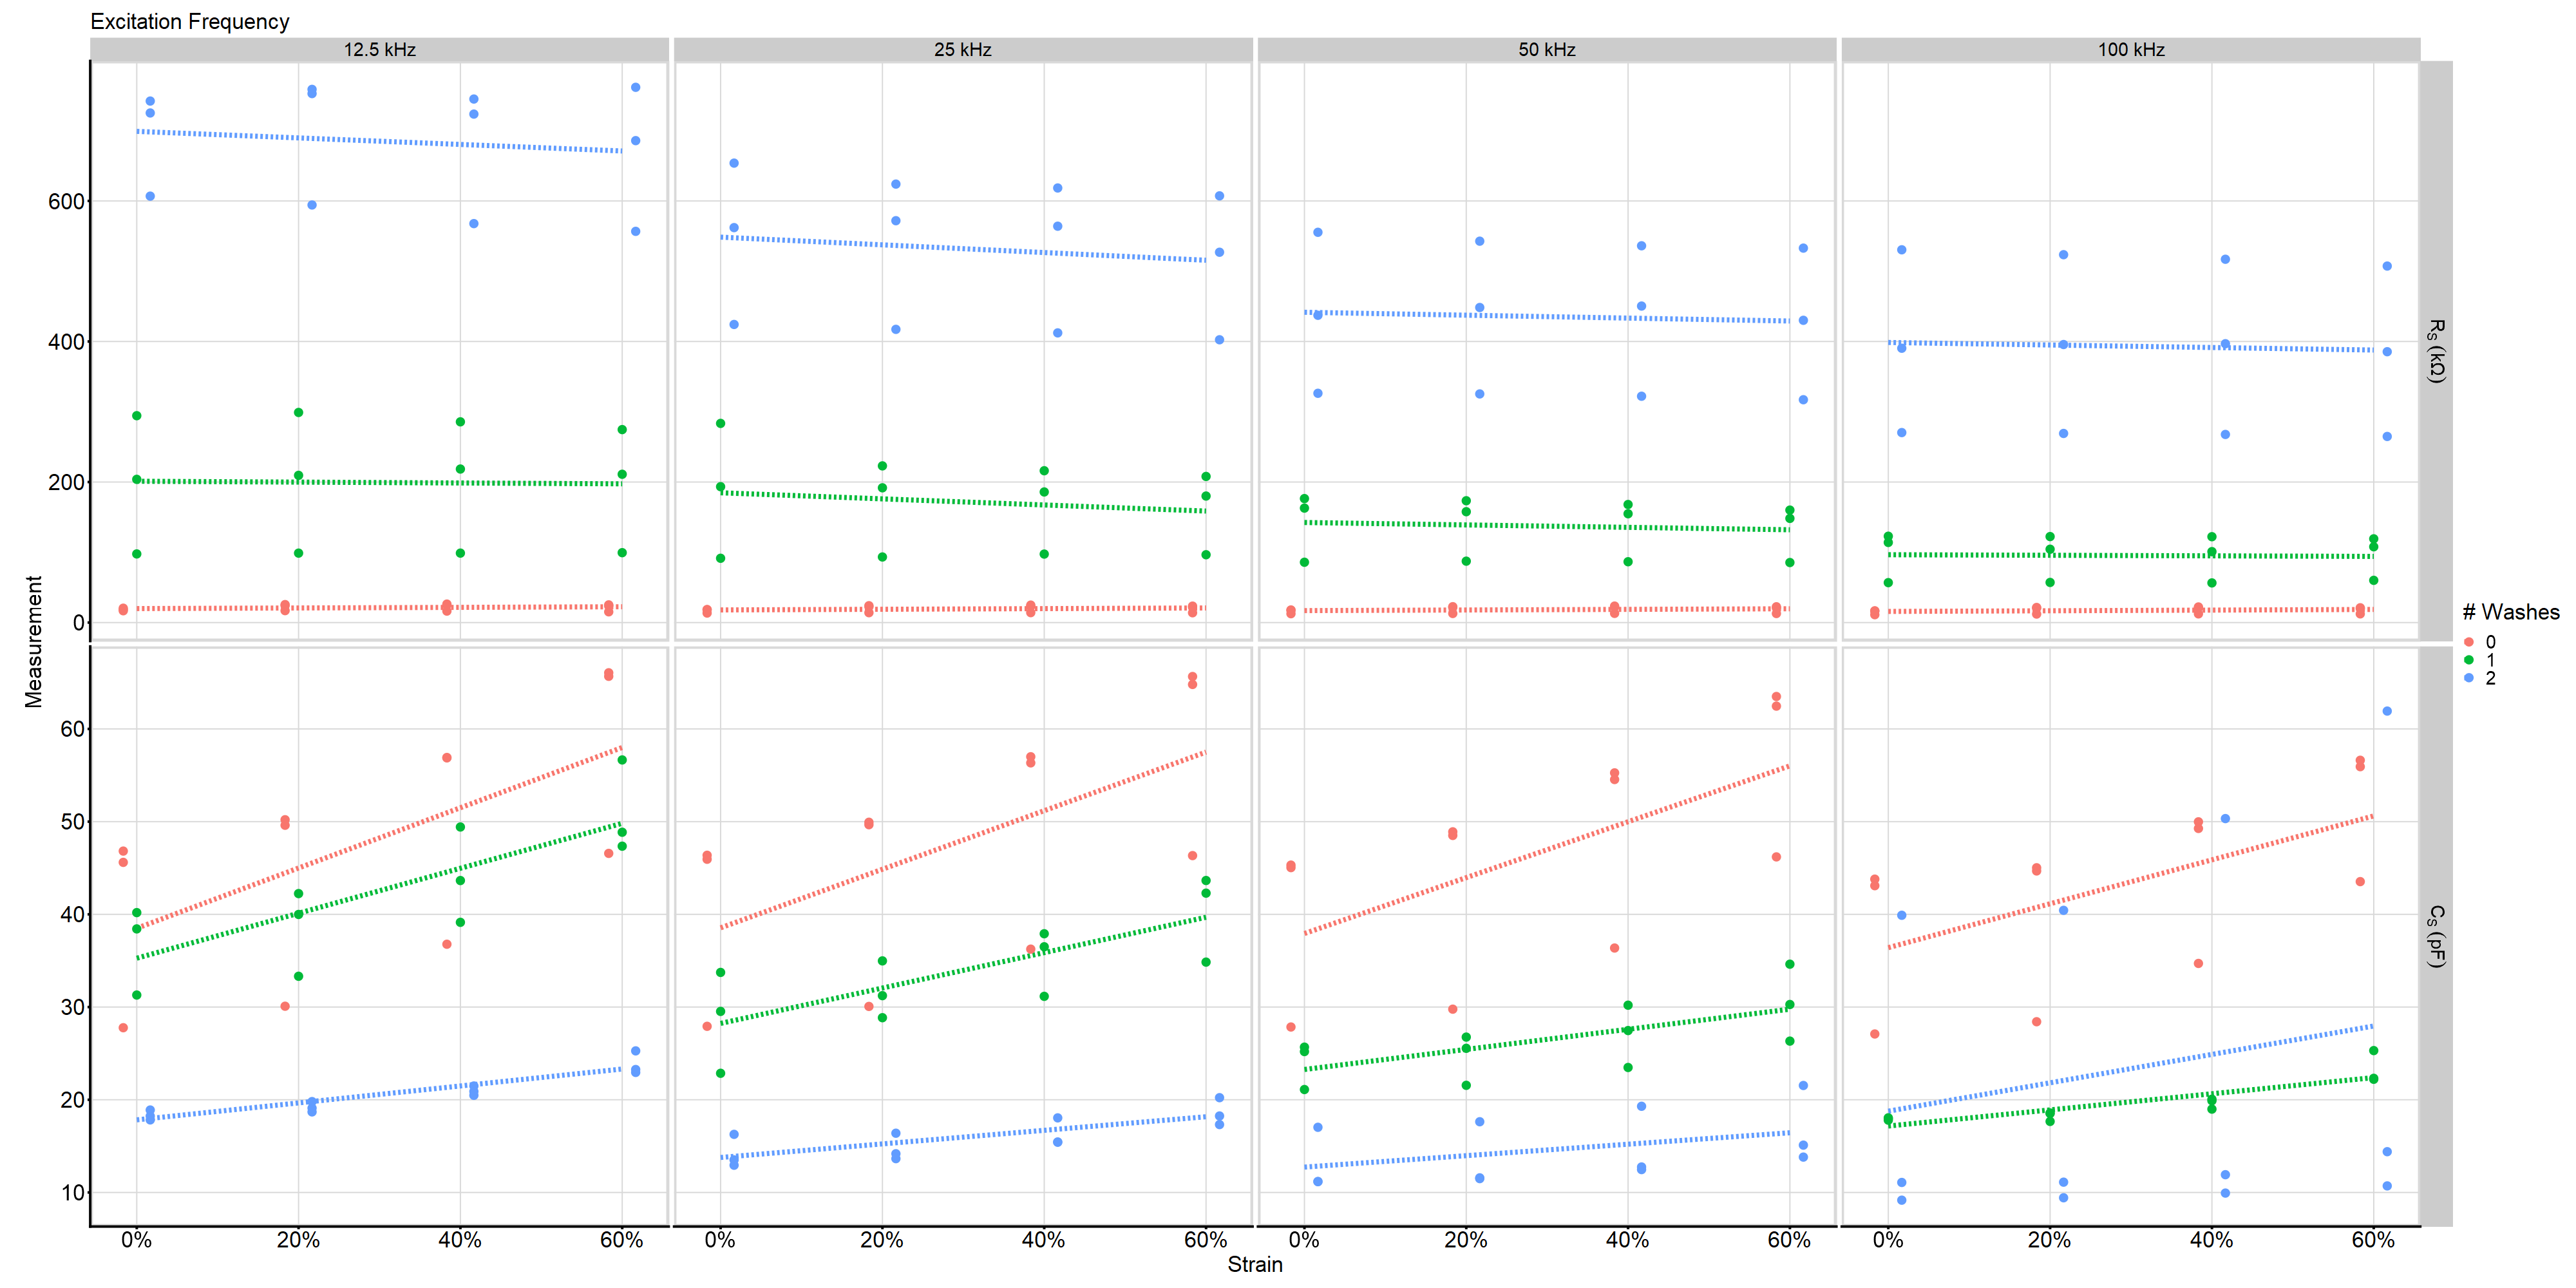

In [70]:
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 200)
freq_names <- setNames(c("12.5 kHz", "25 kHz", "50 kHz", "100 kHz"), sort(unique(test$freq)))

plt1 <- ggplot(data=washing_test_expanded, aes(x=as.numeric(nominal.strain), y=meas.value, group=as.factor(n.washes), colour=as.factor(n.washes)))
plt1 <- plt1 + geom_smooth(method="lm", se=FALSE, linetype="dashed")
plt1 <- plt1 + geom_point(position=position_dodge(widt=0.05))
plt1 <- plt1 + scale_colour_discrete(name="# Washes")#, palette="Blues", direction=-1)
plt1 <- plt1 + facet_grid(meas.type ~ freq, scales="free_y", labeller = labeller(meas.type = label_parsed, freq = freq_names))
plt1 <- plt1 + scale_x_continuous(labels = scales::percent, breaks=c(0, 0.2, 0.4, 0.6, 0.8))
plt1 <- plt1 + xlab("Strain")
plt1 <- plt1 + ylab("Measurement")
plt1 <- plt1 + ggtitle("Excitation Frequency")
plt1 <- plt1 + theme_cowplot(6) + theme(plot.margin = unit(c(0.25,0.25,0.25,0.5), "cm"))
plt1 <- plt1 + panel_border() + background_grid(major="xy", minor="xy", size.major=0.25)
plt1 <- plt1 + theme(plot.background = element_rect(fill='white', colour='white'), panel.grid.minor = element_blank(), text=element_text(size=12), axis.text.x = element_text(size = 12), axis.text.y = element_text(size = 12), plot.title = element_text(size=12, face="plain"))

print(plt1)

In [71]:
ggsave('FigS8.png', width=180, height=90, units="mm", scale=1.5, bg="white", dpi=600)
ggsave('FigS8.eps', width=180, height=90, units="mm", scale=1.5, bg="white", device=cairo_ps, fallback_resolution=600)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
